<a href="https://colab.research.google.com/github/agustinLapi/MachineLearning/blob/main/Machine_Learning_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import numpy as np 
import pandas as pd
# Viz
import seaborn as sns
import matplotlib.pyplot as plt

url_camas = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv"
camas_covid_bahia = requests.get(url_camas)

with open('camas_covid_bahia.csv', 'wb') as f:
    f.write(camas_covid_bahia.content)

col_names = ["total_camas_hospitales", "camas_ocupadas_hospitales", "camas_covid", "camas_sospechosos_covid", "camas_confirmados_covid", "uti_covid_totales", "uti_covid_ocupadas", "respiradores_totales", "respiradores_ocupados", "respiradores_covid_totales", "respiradores_covid_ocupados", "total_camas_ucma", "total_camas_ocupadas_ucma", "sedes_ucma"]
df_camas = pd.read_csv('camas_covid_bahia.csv', delimiter=',')

#Me quedo solamente con las columnas indicadas en col_names, es decir elimino los datos porcentuales y la fecha de los reportes
df_camas = df_camas[col_names]
df_camas

,total_camas_hospitales,camas_ocupadas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
0,848,401,163,42,84,32,24,142,41,69,25,147,19,4
1,848,391,163,25,86,32,17,142,39,69,21,147,21,4
2,848,402,163,21,85,32,22,142,42,71,23,147,19,4
3,848,391,163,30,83,32,21,142,43,72,24,147,15,4
4,848,368,163,32,82,32,24,142,40,72,24,147,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,848,343,155,14,14,32,3,143,22,0,0,137,0,3
84,848,349,155,18,13,32,4,143,25,0,0,137,0,3
85,848,358,155,14,14,32,4,143,25,0,0,137,0,3
86,848,386,155,12,12,32,2,143,24,0,0,137,0,3


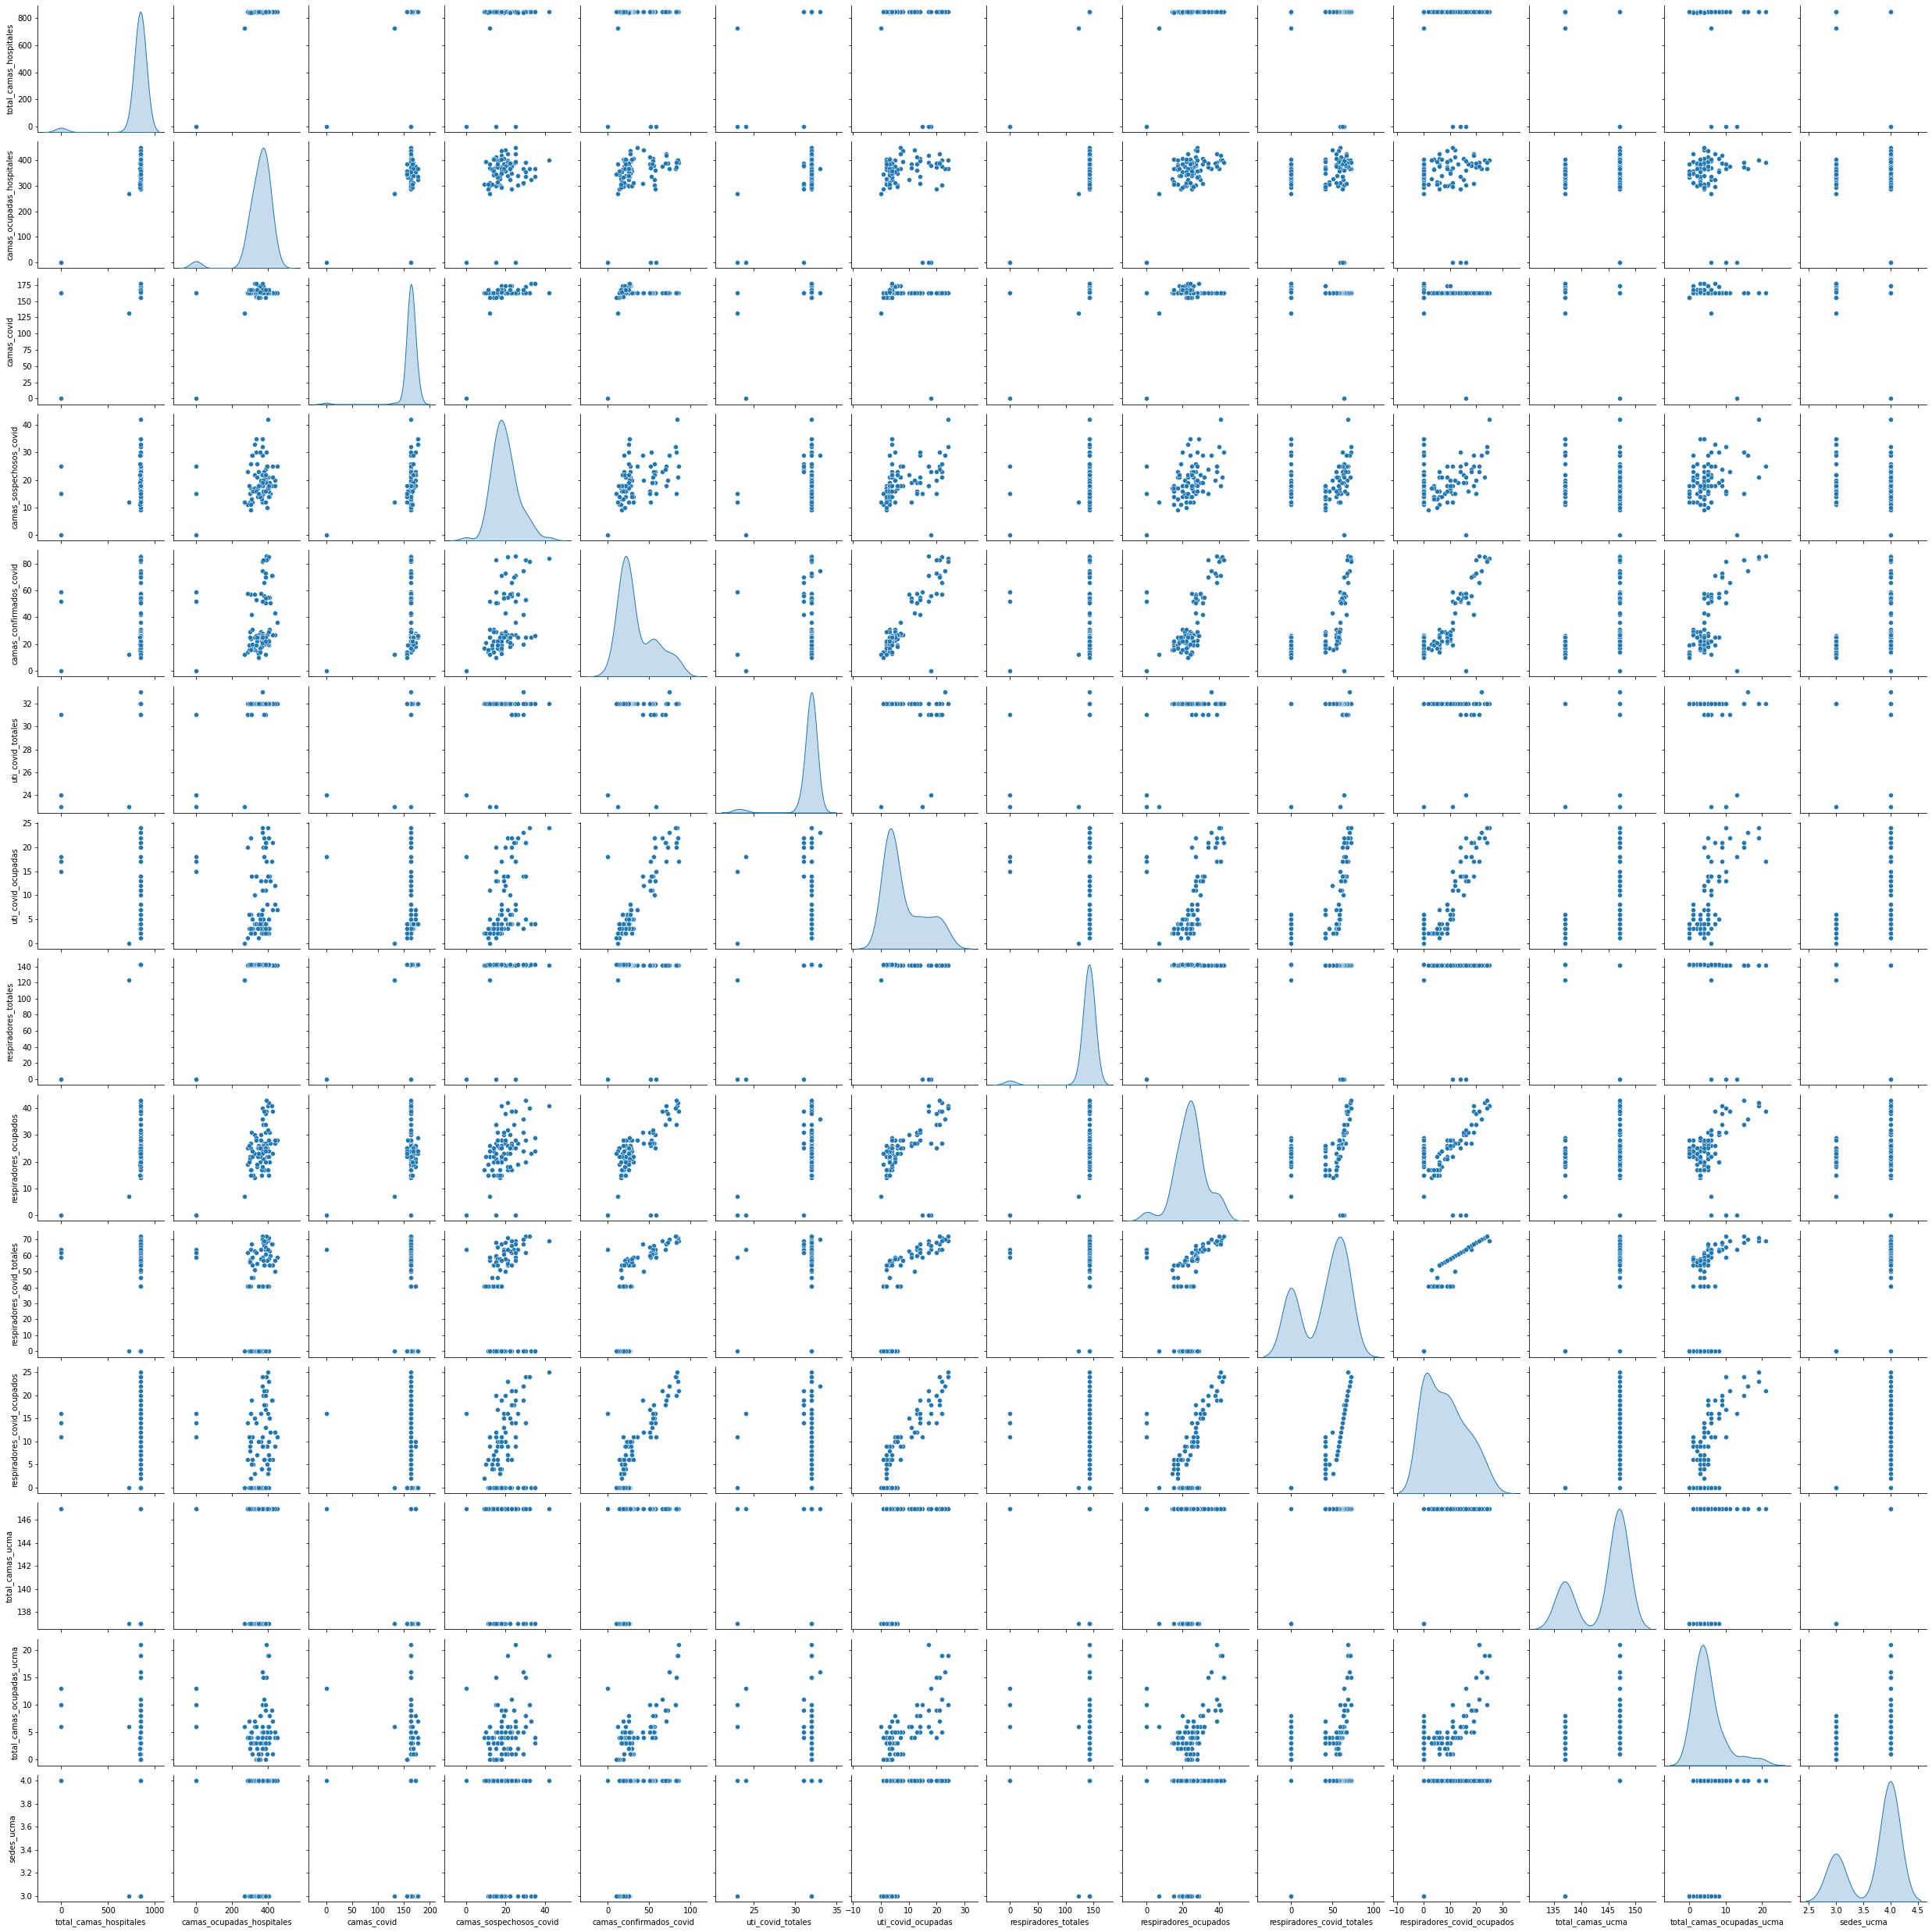

In [ ]:
sns.pairplot(df_camas, diag_kind="kde")

In [ ]:
df_camas.describe()

,total_camas_hospitales,camas_ocupadas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,817.500000,350.159091,162.068182,19.647727,34.909091,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,155.002113,77.216502,18.349603,6.586367,21.706843,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,848.000000,325.750000,163.000000,15.750000,20.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,848.000000,367.500000,163.000000,18.000000,25.000000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,848.000000,391.000000,163.000000,23.000000,52.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,851.000000,450.000000,177.000000,42.000000,86.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


In [ ]:
url_casos = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv"
df_casos = pd.read_csv(url_casos, delimiter = ',')
col_names_casos = ["confirmados","activos","recuperados","decesos","descartados","sospechosos", "contencion_psicologica", "monitoreo_epidemiologico", "aislamiento_por_contacto_estrecho"]

#Realizo el mismo filtro de datos que anteriormente
df_casos = df_casos[col_names_casos]
df_casos

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho
0,106,29,71,6,574,23,342,2338,181
1,114,31,77,6,581,22,342,2207,172
2,124,40,78,6,588,24,356,2162,176
3,137,53,78,6,606,31,356,2353,190
4,154,70,78,6,622,31,356,2377,214
...,...,...,...,...,...,...,...,...,...
83,2589,1319,1209,61,3557,303,417,1261,510
84,2714,1371,1282,61,3615,292,417,1197,554
85,2841,1464,1313,64,3658,286,417,1206,562
86,2906,1474,1366,66,3682,331,417,1221,562


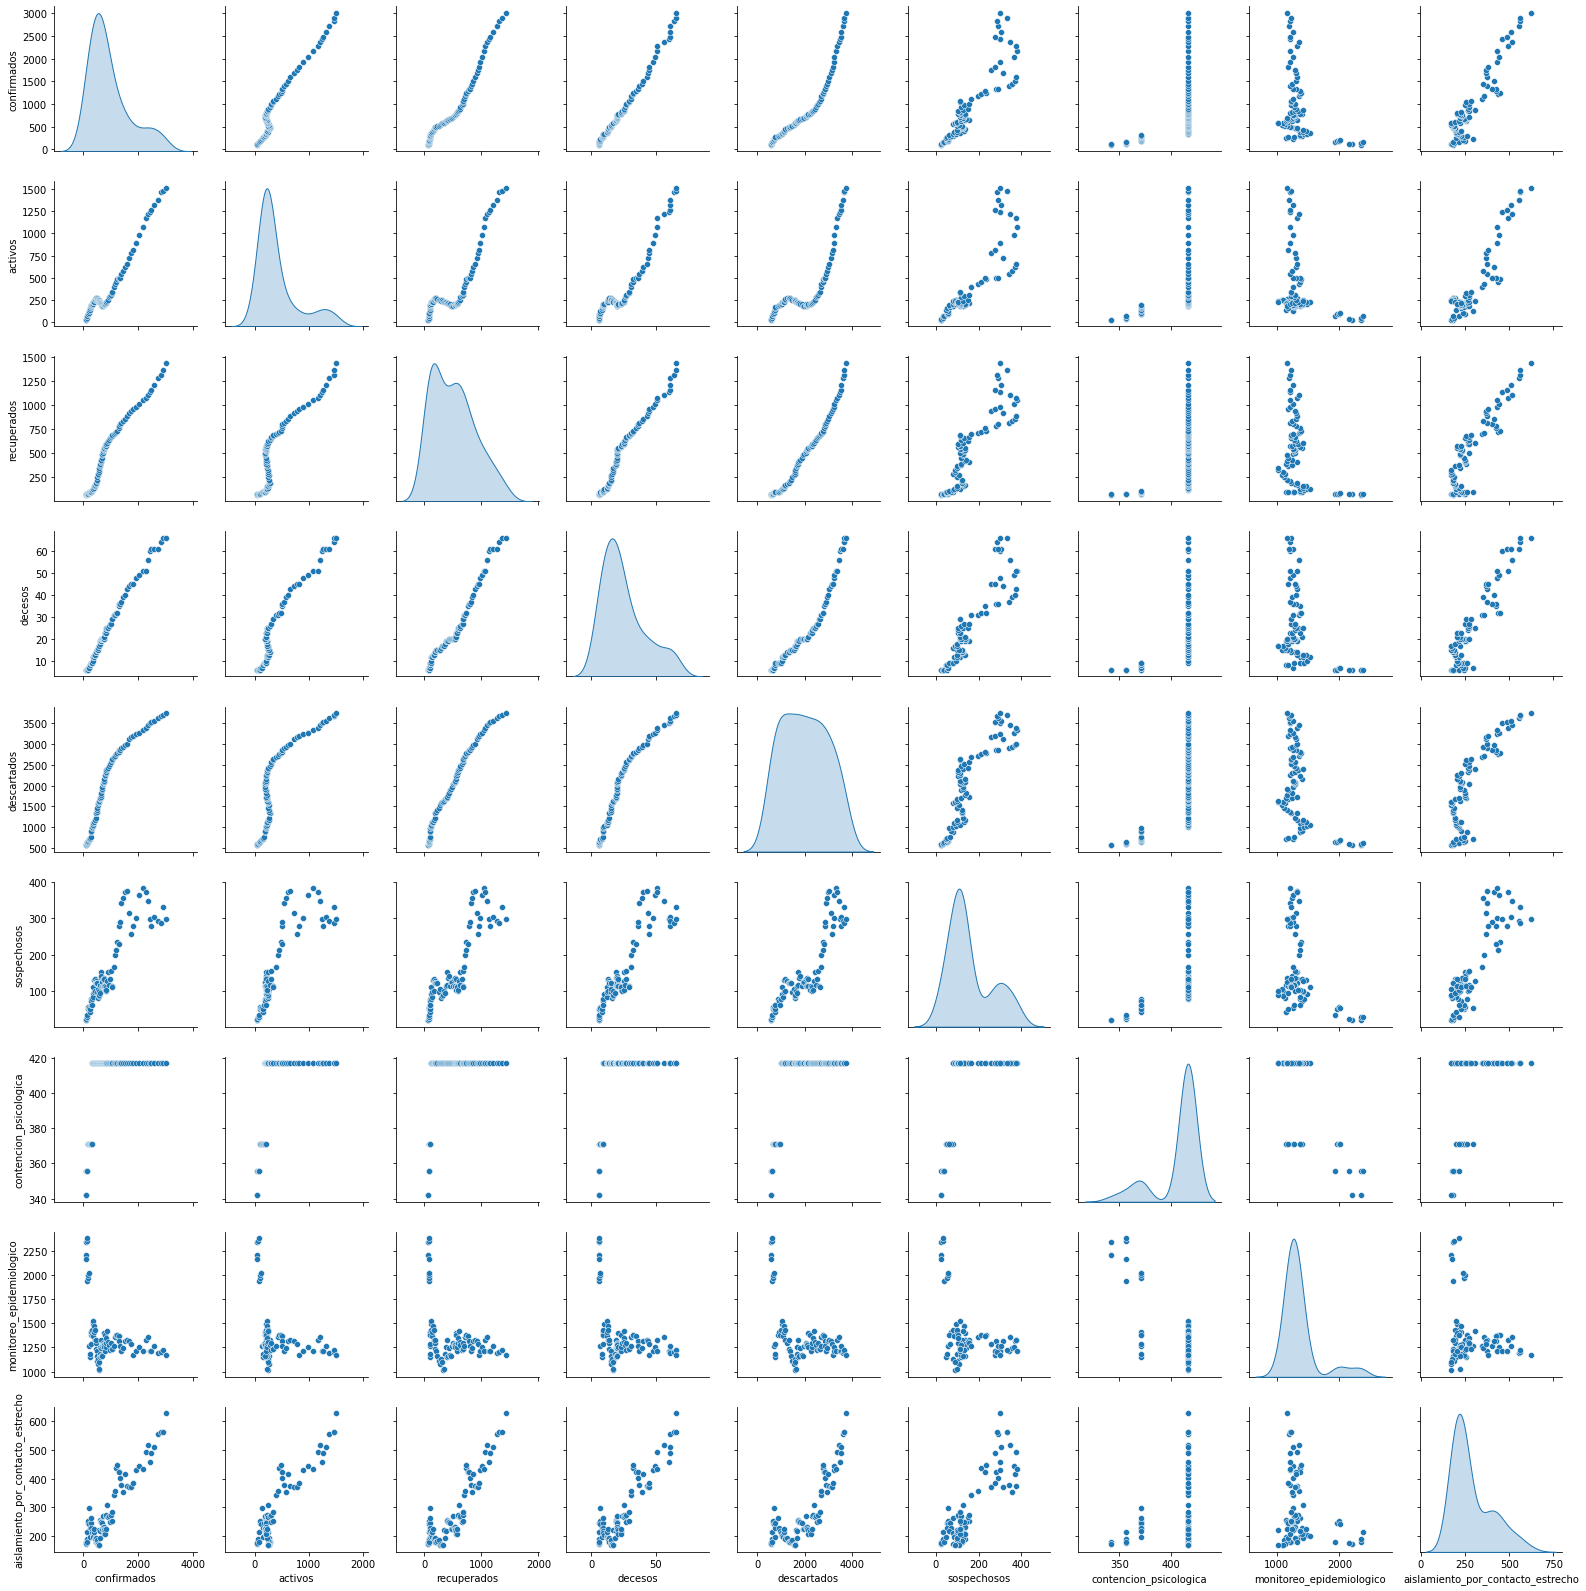

In [ ]:
sns.pairplot(df_casos, diag_kind="kde")

In [ ]:
df_casos.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000


In [ ]:
#sns.pairplot(df_camas, diag_kind="kde")
grouped = df_camas[["camas_ocupadas_hospitales", "camas_confirmados_covid"]] 
grouped["activos"]= df_casos["activos"]
grouped["confirmados"] = df_casos["confirmados"]
grouped

#Me pareció interesante observar las variables de camas ocupadas, y cuales de ellas tienen pacientes con covid, en contraposición con los casos activos y confirmados
#Para ello genere el dataset grouped con estas cuatro columnas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,camas_ocupadas_hospitales,camas_confirmados_covid,activos,confirmados
0,401,84,29,106
1,391,86,31,114
2,402,85,40,124
3,391,83,53,137
4,368,82,70,154
...,...,...,...,...
83,343,14,1319,2589
84,349,13,1371,2714
85,358,14,1464,2841
86,386,12,1474,2906


In [ ]:
grouped.describe()

,camas_ocupadas_hospitales,camas_confirmados_covid,activos,confirmados
count,88.000000,88.000000,88.000000,88.000000
mean,350.159091,34.909091,403.738636,944.977273
std,77.216502,21.706843,377.382561,741.951512
min,0.000000,0.000000,29.000000,106.000000
25%,325.750000,20.000000,201.250000,422.000000
50%,367.500000,25.000000,238.000000,706.500000
75%,391.000000,52.250000,487.750000,1262.750000
max,450.000000,86.000000,1512.000000,3012.000000


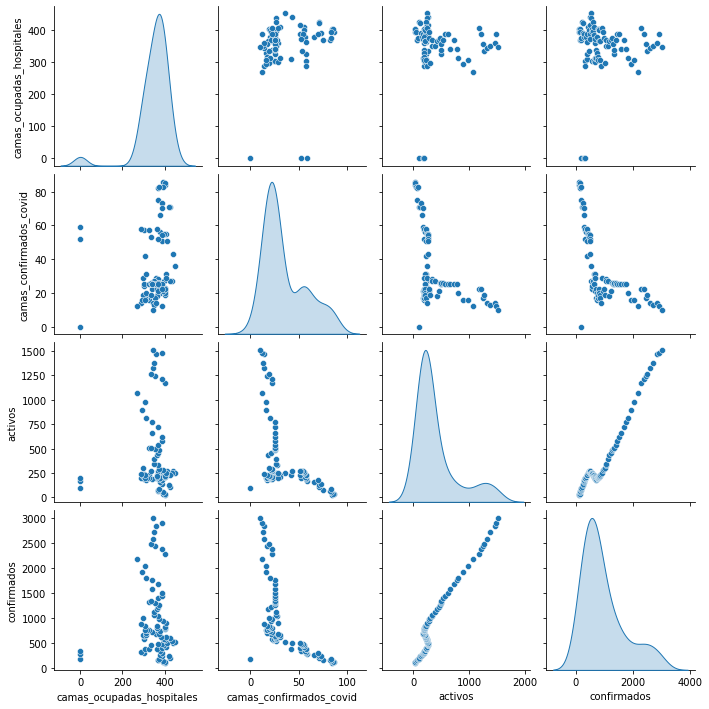

In [ ]:
sns.pairplot(grouped, diag_kind="kde")

In [ ]:
cc = 'camas_confirmados_covid'
cc_mean, cc_std = grouped[cc].mean(), grouped[cc].std()
print("camas_confirmados_covid mean:{} std:{}".format(cc_mean, cc_std))

camas_confirmados_covid mean:34.90909090909091 std:21.706843226093824


In [ ]:
nstd = 2.0
dist = cc_std * nstd

# limites
lower_bound, upper_bound = cc_mean - dist, cc_mean + dist
print('[',lower_bound,',',upper_bound,']')

[ -8.504595543096741 , 78.32277736127855 ]


In [ ]:
# Máscara atípica, Verdadera = atípico
lower_bound = 0 #No hay numero negativo, entonces lo fijo en 0
outliers_mask = [True if x < lower_bound or x > upper_bound else False for x in grouped[cc]]
print("Outliers:\n{}".format(grouped[cc][outliers_mask]) )

Outliers:
0    84
1    86
2    85
3    83
4    82
6    83
Name: camas_confirmados_covid, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


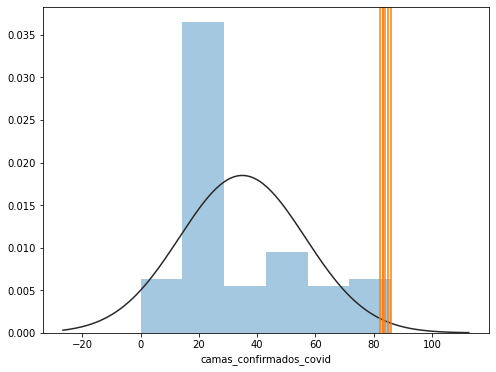

In [ ]:
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(8,6))
sns.distplot(grouped[cc], fit=norm ,kde=False);
for outlier in grouped[cc][outliers_mask]:
    plt.axvline(outlier, 0, grouped[cc].max(), color = '#FF7F0E')

In [ ]:
#Calcular rango intercuartil
q25, q75 = np.percentile(grouped[cc], 25), np.percentile(grouped[cc], 75)
iqr = q75 - q25
iqr

32.25

In [ ]:
# Calcule el rango de valores atípicos
k = 1.5
range_ir = iqr * k

# Límites
lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

In [ ]:
# Máscara atípica, Verdadera = atípico
outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in grouped[cc]]
print("Outliers:\n{}".format(grouped[cc][outliers_mask_ir]) )

Outliers:
Series([], Name: camas_confirmados_covid, dtype: int64)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


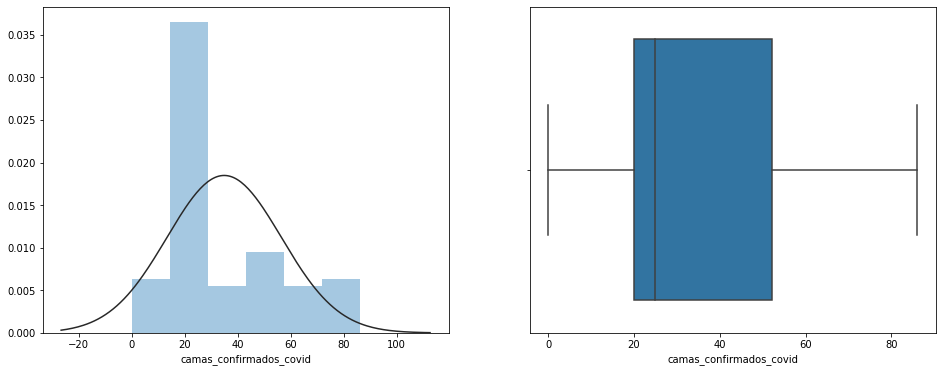

In [ ]:
# Trace el histograma de distribución y resalte los valores atípicos en rojo
plt.figure(figsize=(16,6))
ax1=plt.subplot(1, 2, 1)

sns.distplot(grouped[cc], fit=norm ,kde=False, ax = ax1);

for outlier in grouped[cc][outliers_mask_ir]:
    plt.axvline(outlier, 0, grouped[cc].max(), color = '#FF7F0E')
    
ax2=plt.subplot(1, 2, 2)
sns.boxplot(x=grouped[cc], whis=k, ax = ax2)

In [ ]:
from sklearn.ensemble import IsolationForest

# Valores atípicos en la columna Habitaciones
cc = 'camas_confirmados_covid'

# ajustar 
isolation_forest = IsolationForest(contamination='auto',random_state=0)
isolation_forest.fit(grouped[cc].values.reshape(-1,1))

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [ ]:
# Nuevas muestras en el rango de valores de Habitaciones
xx            = np.linspace(grouped[cc].min(), grouped[cc].max(), len(grouped)).reshape(-1,1)

# Predecir anomaly_score usando bosque de aislamiento
anomaly_score = isolation_forest.decision_function(xx)
outlier       = isolation_forest.predict(xx)

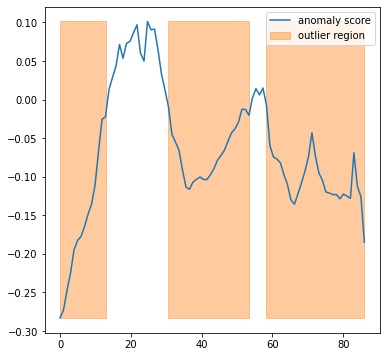

In [ ]:
# Gráfico de valores atípicos
plt.figure(figsize=(6,6))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='#FF7F0E', 
                 alpha=.4, label='outlier region')
plt.legend()

#Conclusiones ::
###Los datos no ayudan al analisis de los mismos, dado que se comparan acumulados, es decir, para cada fecha no se obtienen los casos de ese día, o camas, simplemente es el acumulado de todos los días anteriores. Por otro lado, en las fechas correspondientes a los fines de semana (si bien no se realizó un analisis en este notebook) no hay nuevos casos o enfermos, esto se podría deber a falta de reportes, o carga de datos. 

##De los datos que se grafican daría la sensación que la cantidad de enfermos confirmados no tiene una correlación alta con la cantidad de camas ocupadas. Sino, que esta variable baje o suba, la cantidad de camas ocupadas resulta ser más o menos siempre la misma.

##A su vez del dataset se eliminó la columna observaciones, la cual presentaba en varias ocasiones reportes de que no se podía haber hecho tal reporte, o carga de datos, debido a que no se obtenian los mismos del hospital o institución a quién le correspondia dar ese reporte.